<a href="https://colab.research.google.com/github/subhant5/VPN/blob/main/workshop_day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train),(x_val,y_val) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [21]:
def preprocess(x,y):
  x=tf.cast(x,tf.float32)/255.0
  y=tf.cast(y,tf.int64)
  return x,y

def create_dataset(xs,ys,classes=10):
  ys=tf.one_hot(ys,depth=10)
  return tf.data.Dataset.from_tensor_slices((xs,ys)).map(preprocess).shuffle(len(ys)).batch(128)

In [22]:
train_dataset = create_dataset(x_train,y_train)
val_dataset = create_dataset(x_val,y_val)

In [11]:
model = keras.Sequential([
        keras.layers.Reshape(target_shape=(28*28,), input_shape=(28,28)),
        keras.layers.Dense(units=256, activation='relu'),
        keras.layers.Dense(units=128 , activation='relu'),
        keras.layers.Dense(units=10,activation='softmax')
])

In [23]:
train_dataset

<BatchDataset shapes: ((None, 28, 28), (None, 10)), types: (tf.float32, tf.int64)>

In [25]:
model.compile(optimizer='adam',loss=tf.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = model.fit(train_dataset,epochs=10,validation_data=val_dataset,validation_steps=2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


469/469 [==============================] - 6s 9ms/step - loss: 0.3712 - accuracy: 0.8651 - val_loss: 0.3519 - val_accuracy: 0.8750
Epoch 2/10
469/469 [==============================] - 6s 8ms/step - loss: 0.3251 - accuracy: 0.8810 - val_loss: 0.3115 - val_accuracy: 0.8711
Epoch 3/10
469/469 [==============================] - 6s 9ms/step - loss: 0.3019 - accuracy: 0.8884 - val_loss: 0.3726 - val_accuracy: 0.8477
Epoch 4/10
469/469 [==============================] - 6s 9ms/step - loss: 0.2860 - accuracy: 0.8919 - val_loss: 0.3619 - val_accuracy: 0.8711
Epoch 5/10
469/469 [==============================] - 6s 9ms/step - loss: 0.2685 - accuracy: 0.8996 - val_loss: 0.3921 - val_accuracy: 0.8320
Epoch 6/10
469/469 [==============================] - 6s 9ms/step - loss: 0.2561 - accuracy: 0.9044 - val_loss: 0.3714 - val_accuracy: 0.8867
Epoch 7/10
469/469 [==============================] - 6s 9ms/step - loss: 0.2432 - accuracy: 0.9085 - val_loss: 0.5233 - val_accuracy: 0.8203
Epoch 8/10
469/46

In [33]:
x_val.shape

(10000, 28, 28)

In [36]:
pred = model.predict(np.expand_dims(x_val[12,:,:],0))

In [27]:
pred.shape

(10000, 10)

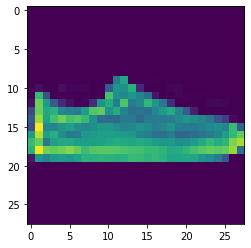

In [31]:
plt.imshow(x_val[12,:,:])

In [37]:
pred[]

array([], shape=(0, 10), dtype=float32)

In [39]:
import numpy as np
np.argmax(pred)

5